In [ ]:
#Étape 1. Importez les bibliothèques nécessaires, nous allons utiliser plus loin
import urllib.request
import os
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_table('totaldataset.txt', sep=';')
df.head(3)

,name,review,sentiment
0,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,positive
1,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,positive
2,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,positive


In [ ]:
#Étape 3. Nettoyer les données textuelles
df.isnull().sum()


name         0
review       0
sentiment    0
dtype: int64

In [ ]:
#supprimer les valeurs null
df = df.dropna()
df.isnull().sum()
len(df)

165679

In [ ]:
#installer nltk 
import nltk
nltk.download('brown')
nltk.download('stopwords')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#tester nltk 
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [ ]:
# init Objects
tokenizer = RegexpTokenizer(r'\w+')
en_stopwords=set(stopwords.words('english'))
ps=PorterStemmer()
def getStemmedReview(review):
    review=review.lower()
    review=review.replace("<br /><br />"," ")
    #Tokenize
    tokens=tokenizer.tokenize(review)
    new_tokens=[token for token in tokens if token not in  en_stopwords]
    stemmed_tokens=[ps.stem(token) for token in new_tokens]
    clean_review=' '.join(stemmed_tokens)
    return clean_review

In [ ]:
len(df.loc[116000:, 'review'].values)

49679

In [ ]:
#Étape 4. Nettoyer toutes les revues et diviser nos données pour la formation et les tests.
df['review'].apply(getStemmedReview)
X_train = df.loc[:116000, 'review'].values
y_train = df.loc[:116000, 'sentiment'].values
X_test = df.loc[116001:, 'review'].values
y_test = df.loc[116001:, 'sentiment'].values

In [ ]:
#installer : pip3 install -U scikit-learn scipy matplotlib ou pip install -U scikit-learn scipy matplotlib

In [ ]:
#Étape 5. Transformer des mots en vecteurs de caractéristiques
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8',
 decode_error='ignore')
vectorizer.fit(X_train)
X_train=vectorizer.transform(X_train)
X_test=vectorizer.transform(X_test)

In [ ]:
#Étape 6. Création du modèle et vérification du score sur les données d'entraînement et de test
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

print("Score on training data is: "+str(model.score(X_train,y_train)))
print("Score on testing data is: "+str(model.score(X_test,y_test)))

Score on training data is: 0.9424401513780054
Score on testing data is: 0.9387052618865493


In [ ]:
# tester sur une nouvelle valeur 
val = ["While the diaper pins are attractive, the metal in the pins I received are flimsy and did not hold up to the thick fabric I used them on. Fortunately there was no baby involved"]

In [ ]:
val =vectorizer.transform(val)

In [ ]:
model.predict(val)

array(['negative'], dtype=object)

In [ ]:
model.predict_proba(val)

array([[0.99667247, 0.00332753]])

**Deuxièmes modèles**


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [ ]:
x=df['review']
y=df['sentiment']
X_train,X_test,y_train,y_test=train_test_split(x,y)

In [ ]:
vect= CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
accuracy_score(model.predict(X_test),y_test)

0.8780350084697911

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
accuracy_score(nb.predict(X_test),y_test)

0.8537549407114624

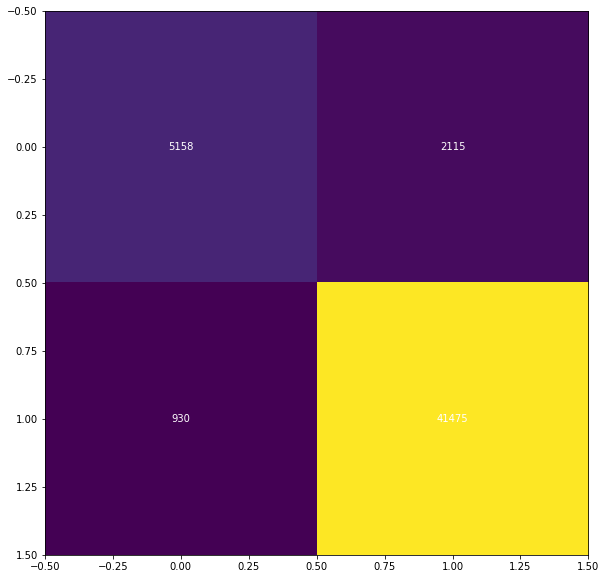

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()